## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

## Task 1
Plot all sample points (train data) from both classes, but samples from the same class should have
the same color and marker.

#### Importing Train Set File

In [2]:
train_set = []
with open('train.txt','r') as file:
    new_reader = csv.reader(file,delimiter=' ')
    for row in new_reader:
        train_set.append(row)

In [3]:
for i in range(len(train_set)):
    for j in range(len(train_set[i])):
        train_set[i][j] = int(train_set[i][j])

#### Class A and Class B fixing

In [4]:
a = []
b = []
for train in train_set:
    if train[2]==1:
        a.append([train[0], train[1]])
    elif train[2]==2:
        b.append([train[0], train[1]])
class_a = np.array(a)
class_b = np.array(b)

#### Displaying the Plot

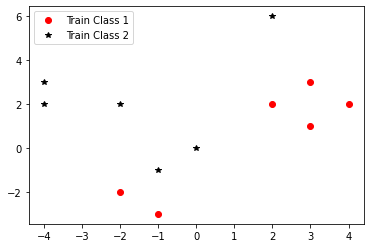

In [5]:
plt.plot(class_a[:,0:1],class_a[:, 1:], linestyle = '', marker='o', color='r', label ="Train Class 1")
plt.plot(class_b[:,0:1],class_b[:, 1:], linestyle = '', marker = '*', color = 'k', label ="Train Class 2")
plt.legend()
plt.show()

## Task 2
Using a minimum distance classifier with respect to ‘class mean’, classify the test data points by
plotting them with the designated class-color but a different marker. Use the Linear Discriminant
Function given below. Also, plot the class means.
\begin{equation}
g_i(X) = X^T  \bar{_iY} - \frac{1}{2} \bar{_iY}^T \bar{_iY}
\end{equation}

#### Importing Test Set File

In [6]:
test_set =[]
with open('test.txt','r') as file:
    new_reader = csv.reader(file,delimiter=' ')
    for row in new_reader:
        test_set.append(row)

In [7]:
for i in range(len(test_set)):
    for j in range(len(test_set[i])):
        test_set[i][j] = int(test_set[i][j])
test_set_new = [[t[0],t[1]] for t in test_set]
test_set_array = np.array(test_set_new)

#### Determining Class

In [8]:
classification = []
mean_class_a = np.array([0,0], dtype=np.float64)
mean_class_b = np.array([0,0], dtype=np.float64)

In [9]:
def find_class(weight = np.array([], dtype=np.float64)):    
    ld_1 = (np.matmul(weight.transpose(),mean_class_a))+0.5*(np.matmul(mean_class_a.transpose(),mean_class_a))
    ld_2 = (np.matmul(weight.transpose(),mean_class_b))+0.5*(np.matmul(mean_class_b.transpose(),mean_class_b))
    
    if(ld_1 >=ld_2):
        classification.extend([1])
        return 1
    else:
        classification.extend([2])
        return 2

In [10]:
mean_class_a[0] = np.mean(class_a[:,0:1], dtype=np.float64)
mean_class_a[1] = np.mean(class_a[:,1:], dtype=np.float64)
mean_class_b[0] = np.mean(class_b[:,0:1], dtype=np.float64)
mean_class_b[1] = np.mean(class_b[:,1:], dtype=np.float64)

In [11]:
test_a = []
test_b = []
for i in range(len(test_set_array)):
    if(find_class(test_set_array[i])==1):
        test_a.append([test_set_array[i][0],test_set_array[i][1]])
    else:
        test_b.append([test_set_array[i][0],test_set_array[i][1]])

final_test_a = np.array(test_a)
final_test_b = np.array(test_b)

#### Plotting of the Means of Training Dataset, Training Dataset, Test Dataset

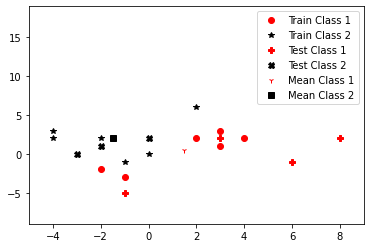

In [12]:
plt.xlim(-5,9)
plt.ylim(-9, 19)
plt.rcParams["figure.figsize"] = (10,4)
plt.plot(class_a[:,0:1],class_a[:, 1:], linestyle = '', marker='o', color='r', label ="Train Class 1")
plt.plot(class_b[:,0:1],class_b[:, 1:], linestyle = '', marker = '*', color = 'k', label ="Train Class 2")
plt.plot(final_test_a[:,0:1],final_test_a[:, 1:], linestyle = '', marker='P', color='r', label ="Test Class 1")
plt.plot(final_test_b[:,0:1],final_test_b[:, 1:], linestyle = '', marker = 'X', color = 'k', label ="Test Class 2")
plt.plot(mean_class_a[0],mean_class_a[1], linestyle = '', marker='1', color='r', label ="Mean Class 1")
plt.plot(mean_class_b[0],mean_class_b[1], linestyle = '', marker = 's', color = 'k', label ="Mean Class 2")
plt.legend()
plt.show()

## Task 3
Draw the decision boundary between the two classes.

In [13]:
mean_1 = np.array([[mean_class_a[0]], [mean_class_b[0]]])
mean_2 = np.array([[mean_class_a[1]], [mean_class_b[1]]])

#### Determining Line Equation

Here, $y=mx+c$ formula is used

Where,
$ m = (\omega_1^T - \omega_2^T)$

$c = 0.5 * (\omega_1^T\omega_1 - \omega_2^T\omega_2)$

In [14]:
def line_equation(x):
    y = (mean_class_a[0]-mean_class_b[0])*x-0.5*(np.dot(np.transpose(mean_1), mean_1))+0.5*(np.dot(np.transpose(mean_2), mean_2))
    z = y/(mean_class_a[1]-mean_class_b[1])
    return -z[0][0]

In [15]:
x_values = []
y_values = []
for i in np.arange(-5, 9, 0.5):
    x_values.append(i)
    y_values.append(line_equation(i))

#### Plotting all points and Decision Boundary

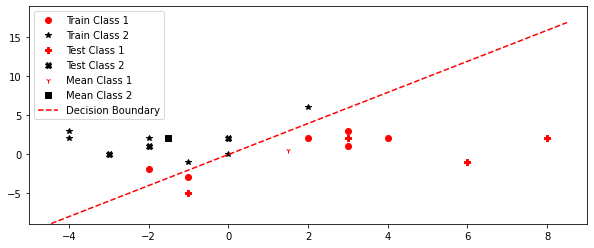

In [16]:
plt.xlim(-5,9)
plt.ylim(-9, 19)
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(class_a[:,0:1],class_a[:, 1:], linestyle = '', marker='o', color='r', label ="Train Class 1")
plt.plot(class_b[:,0:1],class_b[:, 1:], linestyle = '', marker = '*', color = 'k', label ="Train Class 2")
plt.plot(final_test_a[:,0:1],final_test_a[:, 1:], linestyle = '', marker='P', color='r', label ="Test Class 1")
plt.plot(final_test_b[:,0:1],final_test_b[:, 1:], linestyle = '', marker = 'X', color = 'k', label ="Test Class 2")
plt.plot(mean_class_a[0],mean_class_a[1], linestyle = '', marker='1', color='r', label ="Mean Class 1")
plt.plot(mean_class_b[0],mean_class_b[1], linestyle = '', marker = 's', color = 'k', label ="Mean Class 2")
plt.plot(x_values, y_values, linestyle='--', color='r', label="Decision Boundary")
plt.legend()
plt.show()

## Task 4
Find accuracy

In [17]:
undivided_test_set_array = np.array(test_set)
extract_class = []
for t in undivided_test_set_array:
    extract_class.append(t[2])
cnt = 0
for i, j in zip(extract_class, classification):
    if i==j:
        cnt=cnt+1
print("Accuracy is:", cnt/len(extract_class)*100,"%")

Accuracy is: 85.71428571428571 %
